# Multi-task Lasso

https://scikit-learn.org/stable/modules/linear_model.html#multi-task-lasso

The MultiTaskLasso is a linear model that estimates sparse coefficients for multiple regression problems jointly: y is a 2D array, of shape (n_samples, n_tasks). 
    
The constraint is that the selected features are the same for all the regression problems, also called tasks.

The following figure compares the location of the non-zero entries in the coefficient matrix W obtained with a simple Lasso or a MultiTaskLasso. The Lasso estimates yield scattered non-zeros while the non-zeros of the MultiTaskLasso are full columns.

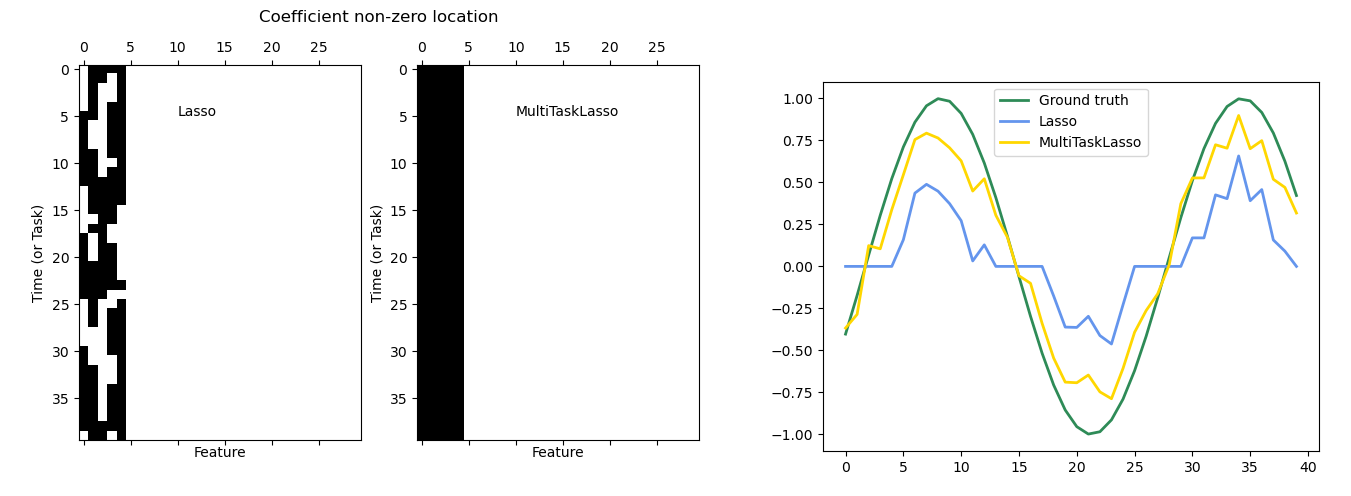

Fitting a time-series model, imposing that any active feature be active at all times.


Mathematically, it consists of a linear model trained with a mixed $l_{1}, l_{2}$-norm for regularization. 

The objective function to minimize is:

$$ \min_{w} \frac {1} {2n_{samples}} || XW - Y ||^{2}_{Fro} + \alpha || W ||_{21} $$

where $Fro$ indicates the Frobenius norm:
    
$$ ||A||_{Fro} = \sqrt {\sum_{ij} \alpha^{2}_{ij}} $$

and $l_{1}, l_{2}$ reads:
    
$$ ||A||_{21} = \sum_{i} \sqrt {\sum_{j} \alpha^{2}_{ij}} $$

The implementation in the class MultiTaskLasso uses coordinate descent as the algorithm to fit the coefficients.

# Example: Multi-Task Lasso

Joint feature selection with multi-task Lasso

https://scikit-learn.org/stable/auto_examples/linear_model/plot_multi_task_lasso_support.html#sphx-glr-auto-examples-linear-model-plot-multi-task-lasso-support-py

Automatically created module for IPython interactive environment
Lasso and MultiTaskLasso:


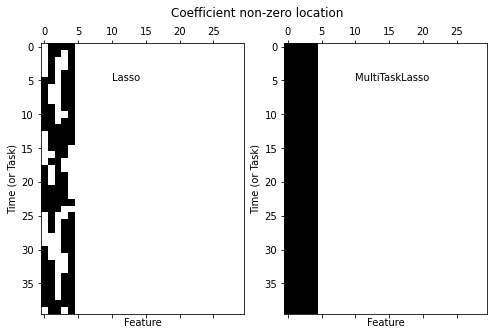

Plot, Ground Truth, Lasso, and MultiTaskLasso:


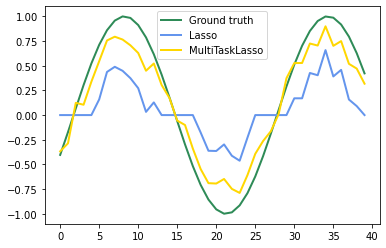

In [1]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import MultiTaskLasso, Lasso

rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X, Y).coef_

# #############################################################################
# Plot support and time series
print ('Lasso and MultiTaskLasso:')
fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Lasso')
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'MultiTaskLasso')
fig.suptitle('Coefficient non-zero location')
plt.show()

print ('Plot, Ground Truth, Lasso, and MultiTaskLasso:')
feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw,
         label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw,
         label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw,
         label='MultiTaskLasso')
plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])
plt.show()